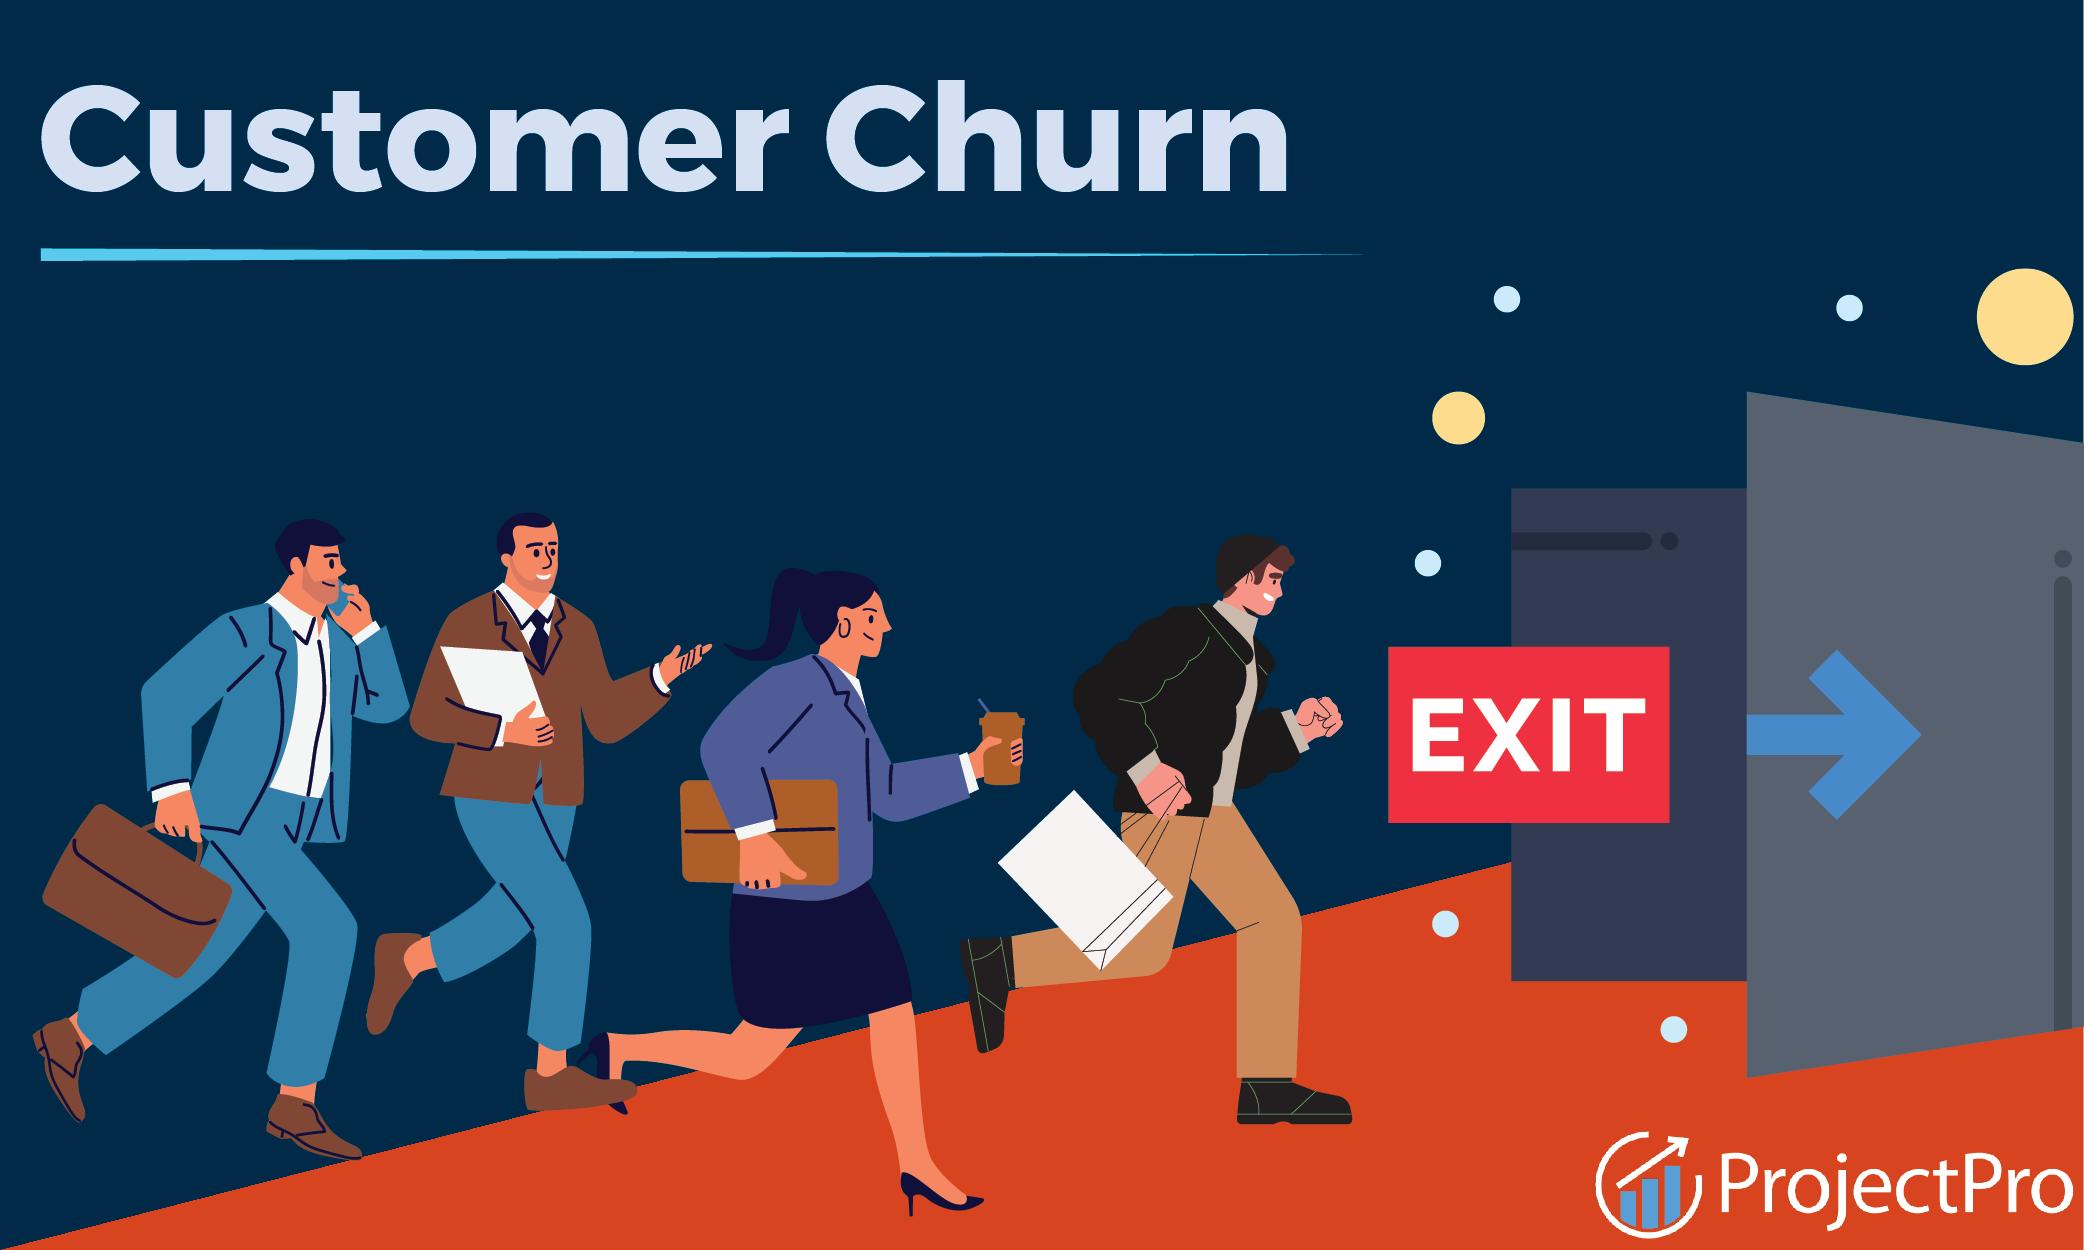
Introduction
This analysis aims to explore customer churn in an e-commerce platform and its relationships with various aspects of the business, including customer experience. The dataset used for this study is the E-Commerce Customer Churn Analysis dataset.

Dataset Columns:

* CustomerID: Unique identifier for each customer.
* Churn: Indicates whether a customer churned (1) or not (0).
* Tenure: Duration of the customer's association with the e-commerce platform.
* PreferredLoginDevice: Preferred device used for logging into the platform.
* CityTier: Classification of cities based on tiers.
* WarehouseToHome: Distance between the customer's home and the nearest warehouse.
* PreferredPaymentMode: Customer's preferred mode of payment.
* Gender: Gender of the consumer.
* HourSpendOnApp: Number of hours spent by the customer on the e-commerce platform.
* NumberOfDeviceRegistered: Total number of devices registered by a user.
* PreferedOrderCat: Preferred product category of the customer in the last month.
* SatisfactionScore: Customer's satisfaction score.
* MaritalStatus: Customer's marital status.
* NumberOfAddress: Number of addresses added by the customer.
* Complain: Indicates whether a customer filed a complaint (1) or not (0).
* OrderAmountHikeFromlastYear: Percentage increase in order amount compared to the last year.
* CouponUsed: Total number of coupons used by the customer.
* OrderCount: Total number of orders placed by the customer in the last month.
* DaySinceLastOrder: Number of days since the customer's last purchase.
* CashbackAmount: Amount of cashback received by the customer in the last month.


In this study, we will perform exploratory data analysis
(EDA) to gain insights into the dataset and investigate the factors that might influence customer churn in the e-commerce platform. We will also explore relationships between various features and churn to better understand the underlying patterns in the data.






In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read The CSV File
df = pd.read_csv('/content/Copy of E Commerce Dataset.csv')
df.head(20)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [ ]:
df.drop('CustomerID', axis=1, inplace=True) #set inplace true to reflect the change on original dataframe.

# Exploratory Data Analysis
> 1. **Data Structures:** Understanding the structures of the dataset (number of rows/columns, data types, etc)

> 2. **Handling Outliers and Missing Values:** Identifying and handling the missing values in the dataset.

> 3. **Summary Statistics:** Providing some basic summary statistics (count, mean, standard deviation, etc. for numerical columns).

> 4. **Value Counts:** Checking the frequency of occurrence of the values in categorical columns.

> 5. **Visualisation:** Creating some basic visualisation to better understanding of the data






## 1. **Data Structures:**

In [ ]:
df.shape

(5630, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

## 2. **Handling Outliers and Missing Values:**

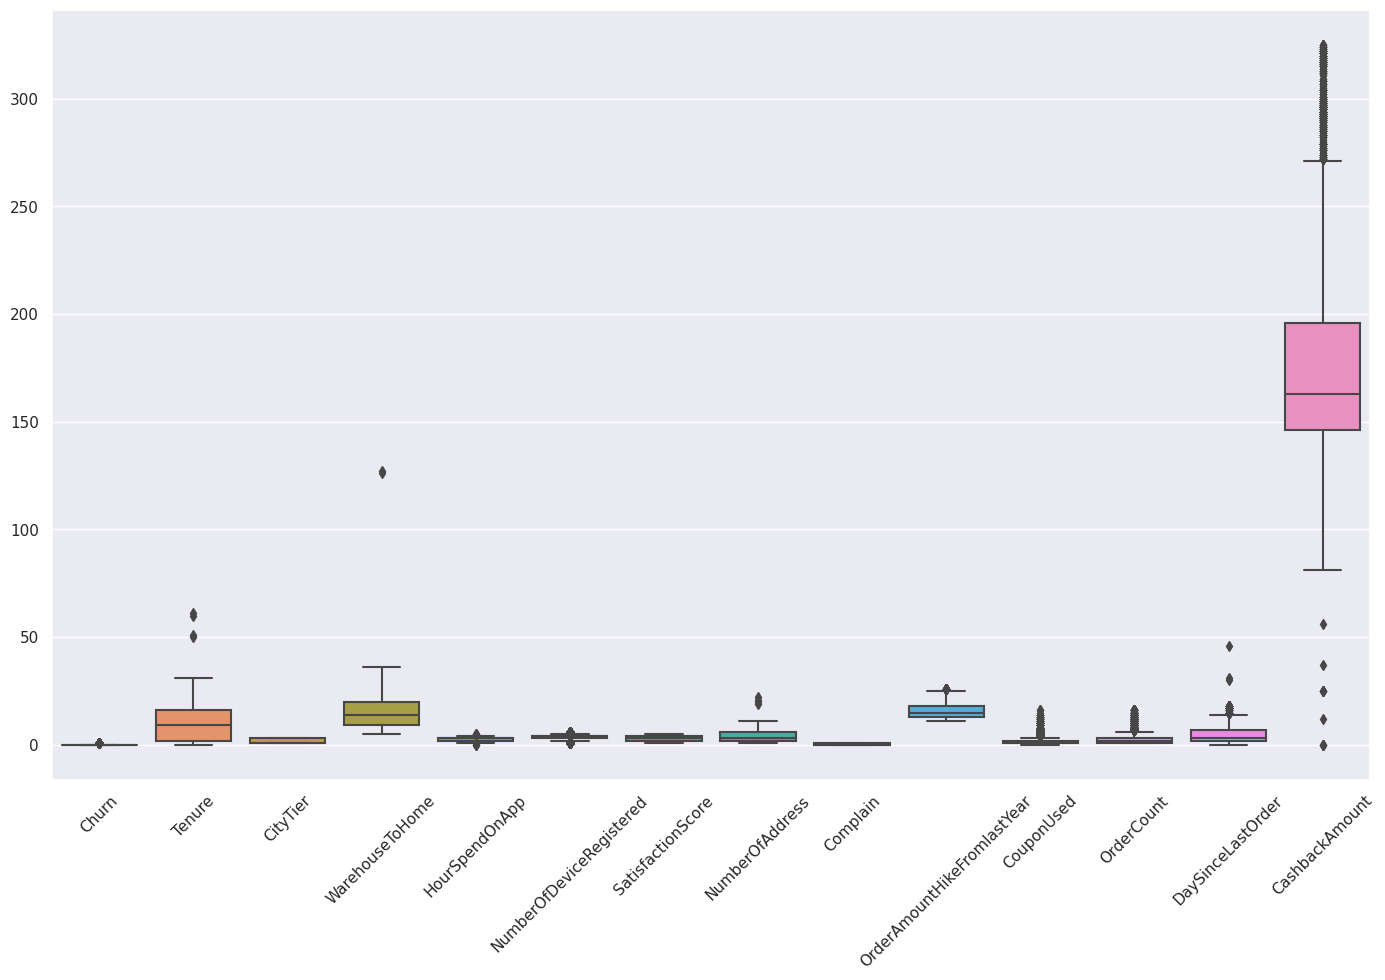

In [ ]:
sns.set(style='darkgrid', palette='muted')
fig, ax = plt.subplots(figsize=(17,10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
categorical_cols = list(df.select_dtypes(include='object').columns)
numerical_cols = list(df.select_dtypes(exclude='object').columns)
numerical_cols.remove('Churn')

In [ ]:
categorical_cols

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [ ]:
numerical_cols

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [ ]:
for cols in numerical_cols:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR = Q3 - Q1
  lr = Q1 - (1.5*IQR)
  ur = Q3 + (1.5*IQR)
  df[cols] = df[cols].mask(df[cols]<lr, lr, )
  df[cols] = df[cols].mask(df[cols]>ur, ur, )


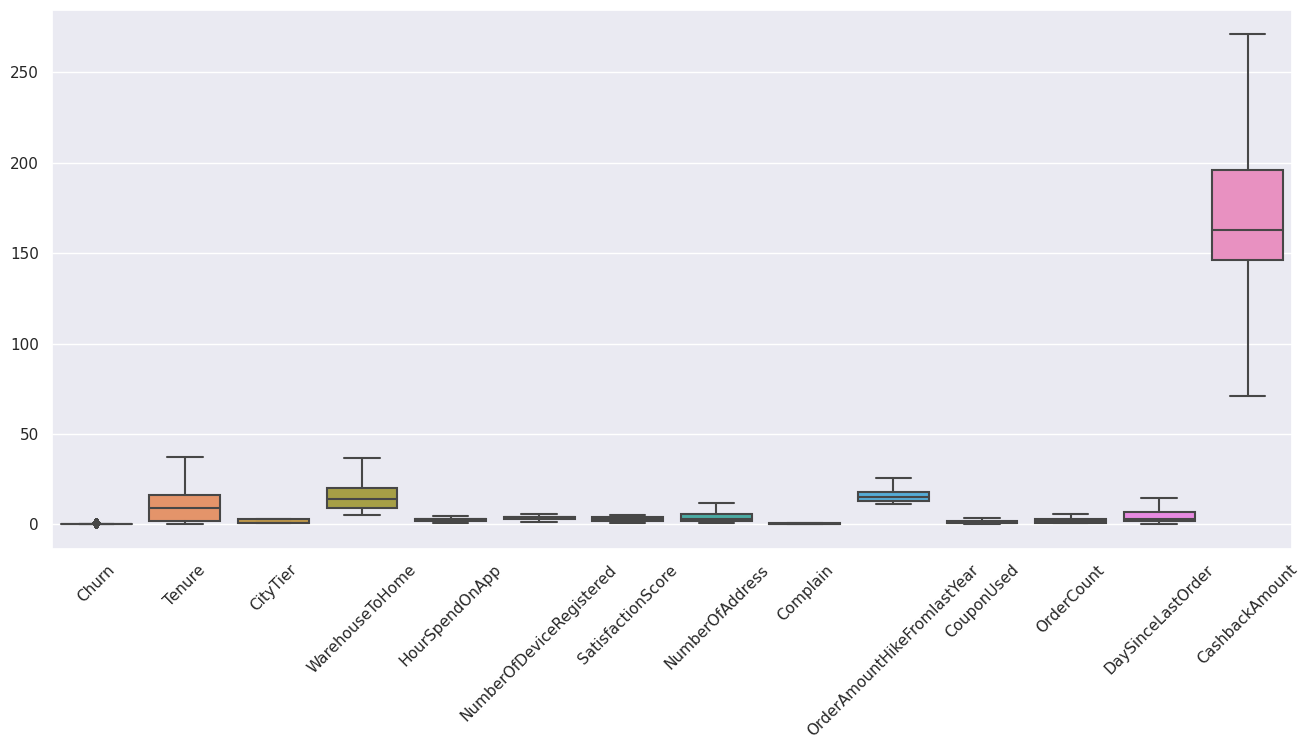

In [ ]:
fig, ax = plt.subplots(figsize = (16, 7))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()


In [ ]:
# Handling Missing Values
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df['Tenure'].fillna(df.Tenure.median(), inplace = True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace = True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace = True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.mean()), inplace = True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace = True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace = True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace = True)

In [ ]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## 3.  **Summary Statistics:**

In [ ]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.120959,1.654707,15.534813,2.934636,3.695471,3.066785,4.207993,0.284902,15.718739,1.440409,2.520604,4.429130,175.225577
std,0.374240,8.299859,0.915389,8.089328,0.703826,0.942015,1.380194,2.555111,0.451408,3.580257,1.071295,1.711109,3.439184,43.834427
min,0.000000,0.000000,1.000000,5.000000,0.500000,1.500000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,71.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,1.000000,37.000000,3.000000,36.500000,4.500000,5.500000,5.000000,12.000000,1.000000,25.500000,3.500000,6.000000,14.500000,271.000000


## 4. **Value Counts:**

In [ ]:
# Value count of Categorical Columns
for cols in categorical_cols:
  print(df[cols].value_counts())

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
Male      3384
Female    2246
Name: Gender, dtype: int64
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


In [ ]:
print(df['Churn'].value_counts())

0    4682
1     948
Name: Churn, dtype: int64


## 5. **Visualisation:**

### Univariate Visualisation


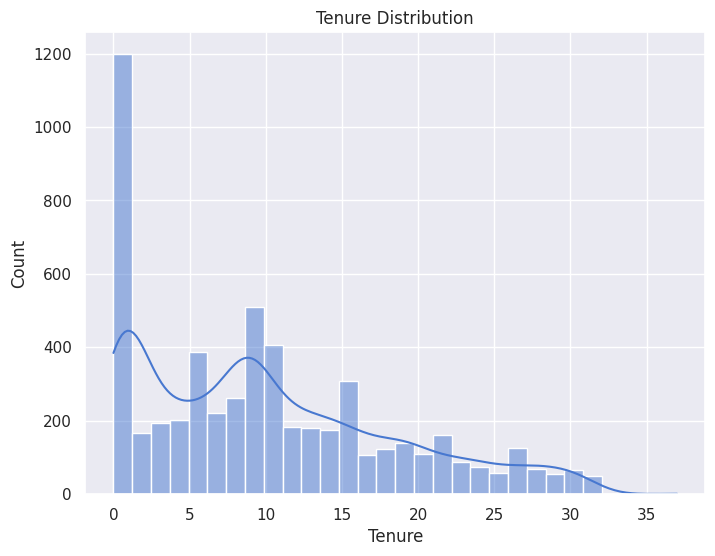

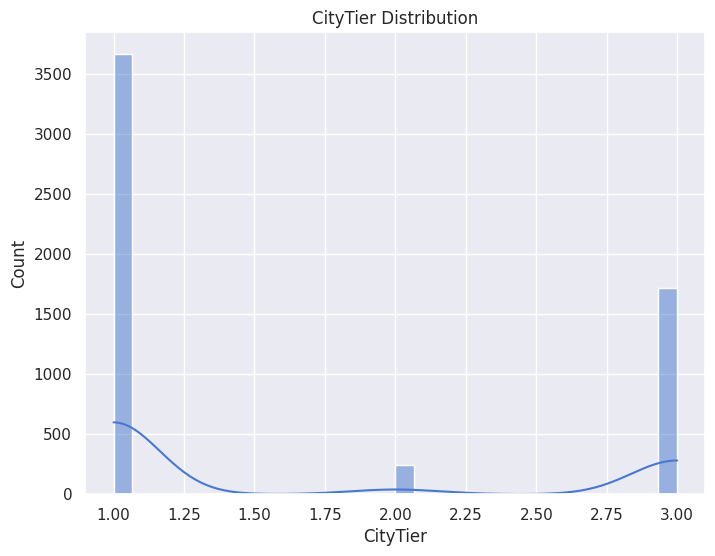

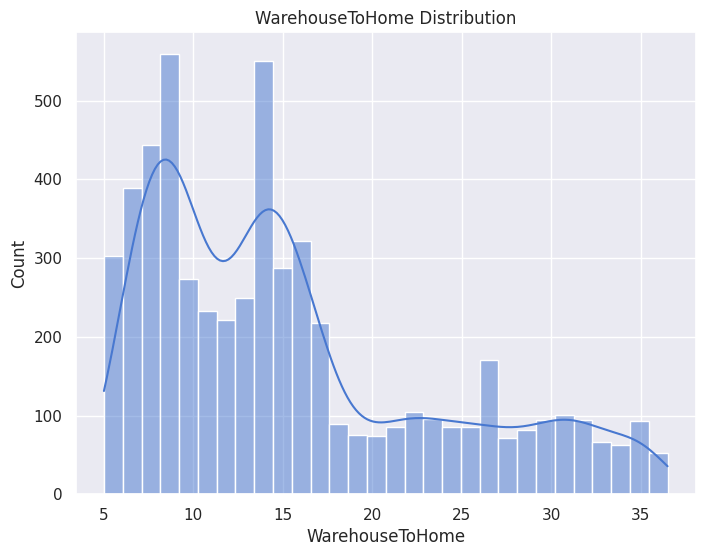

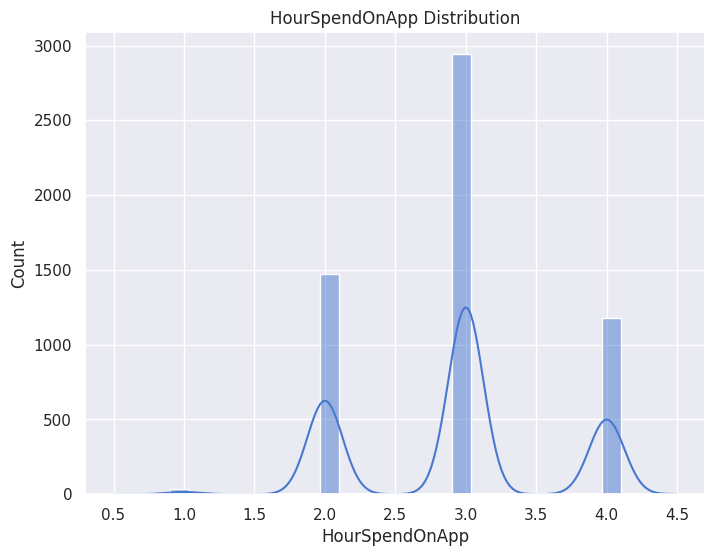

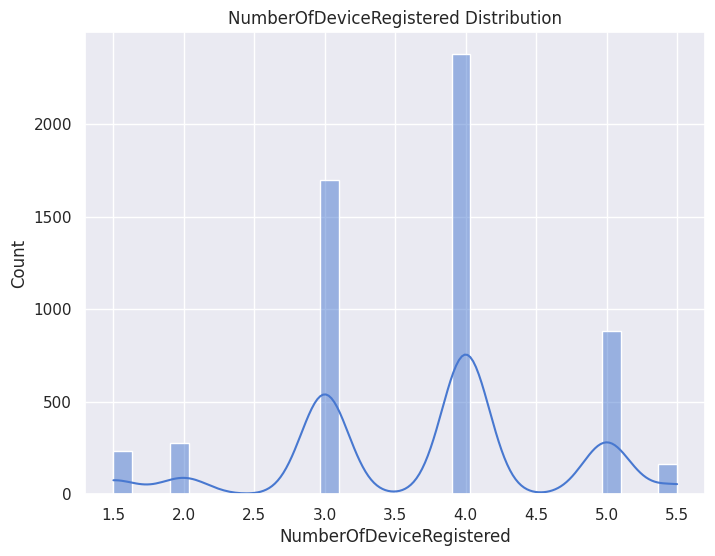

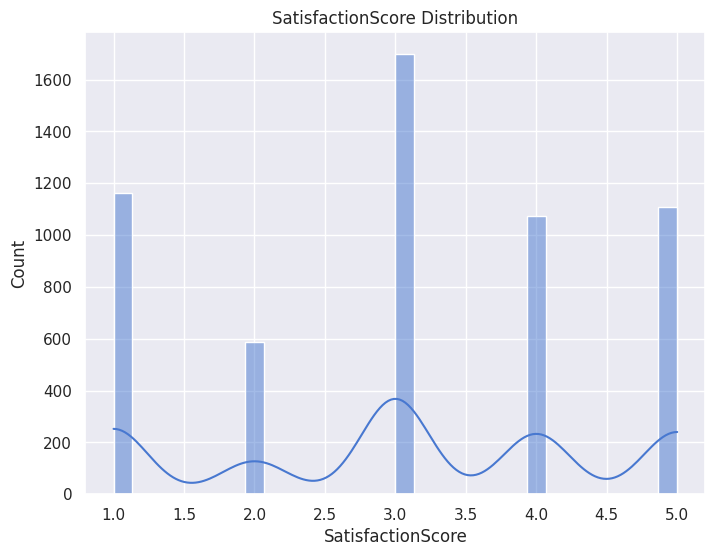

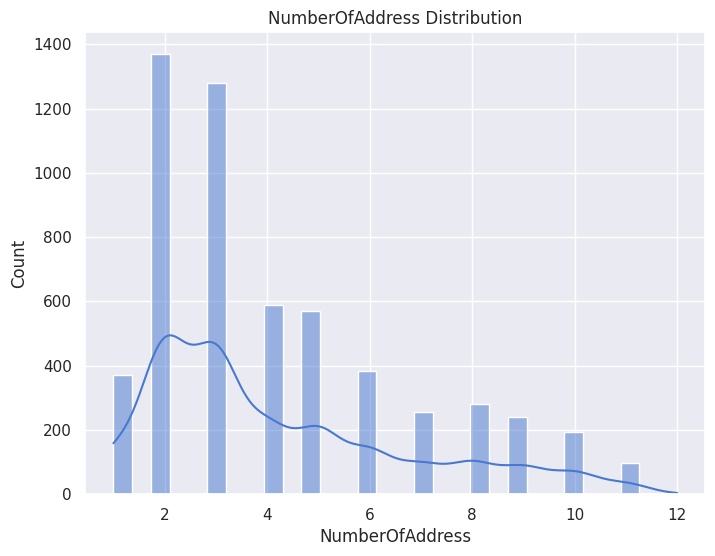

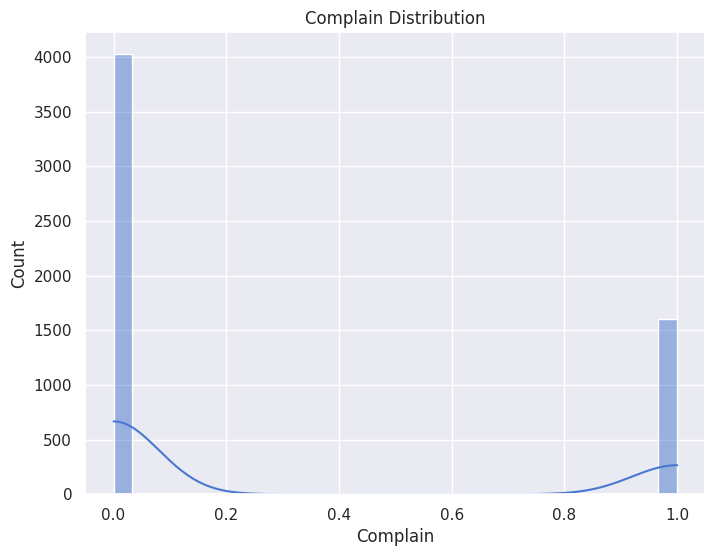

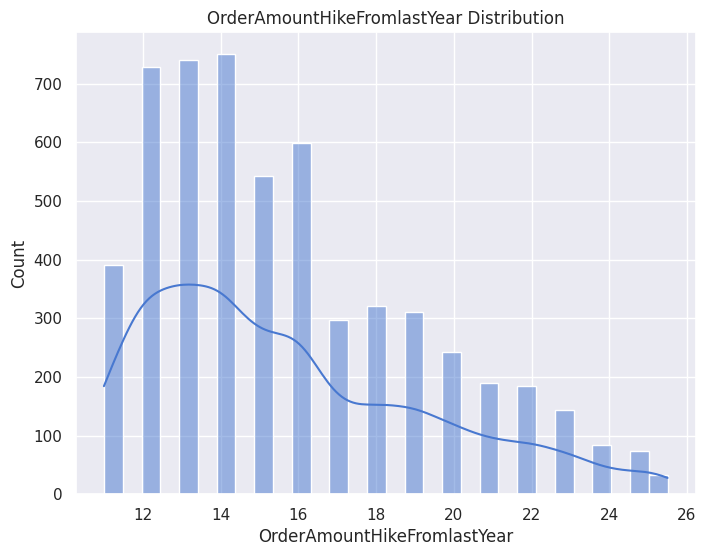

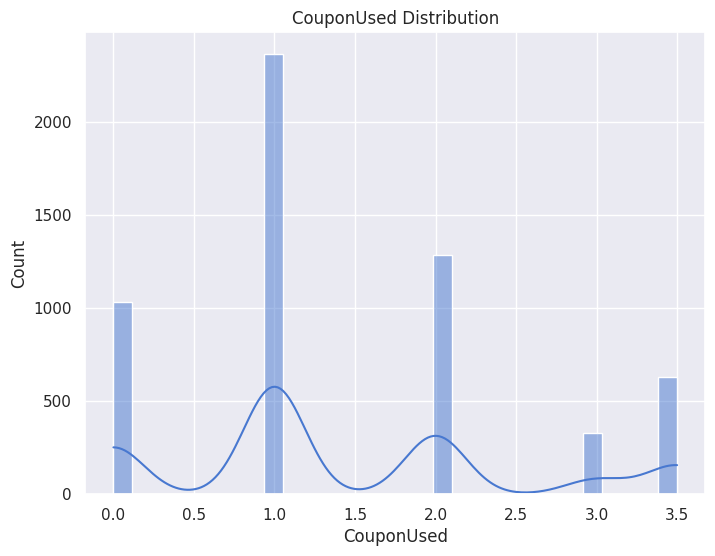

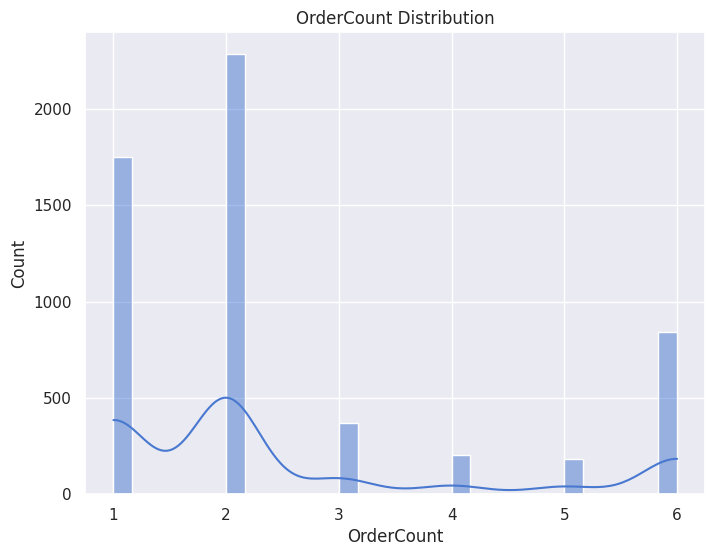

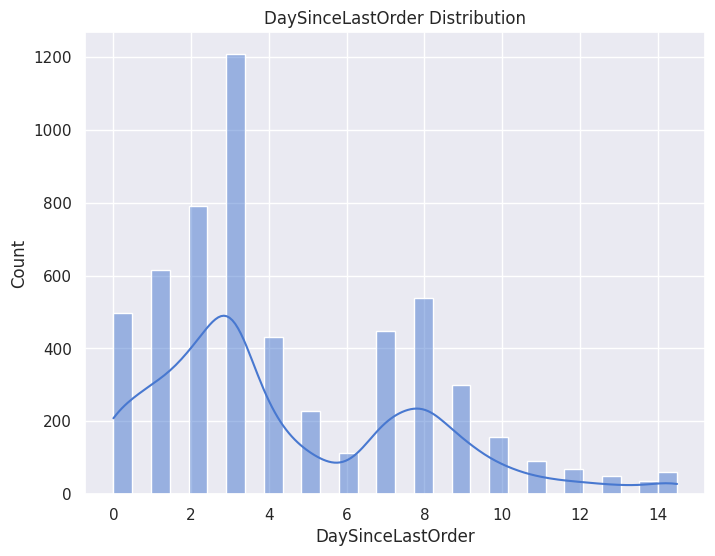

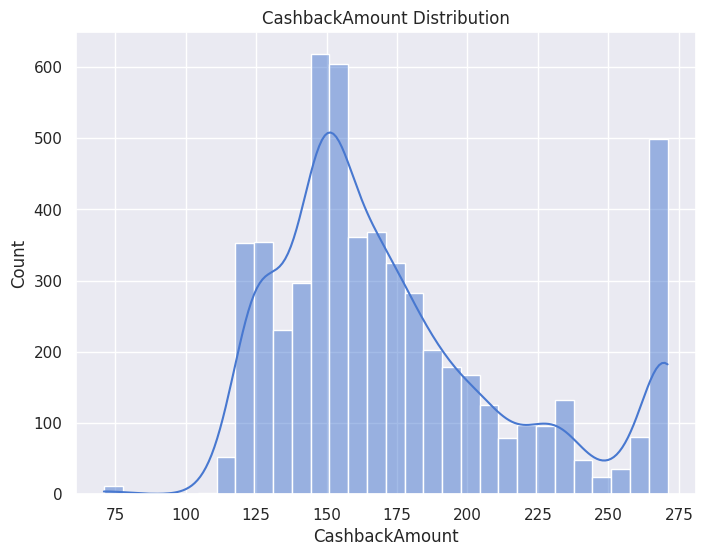

In [ ]:
# Histogram for numerical columns: Visualise the of Numerical
for cols in numerical_cols:
  plt.figure(figsize = (8, 6))
  sns.histplot(data = df[cols], bins = 30, kde = True)
  plt.title(f'{cols} Distribution')
  plt.show()

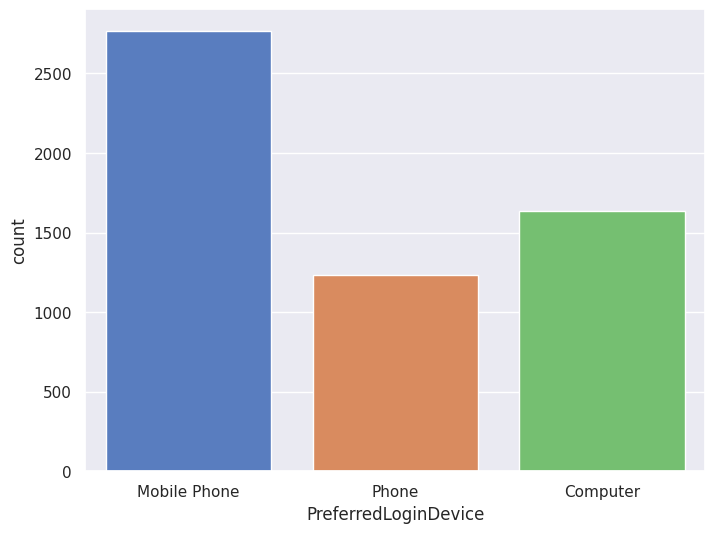

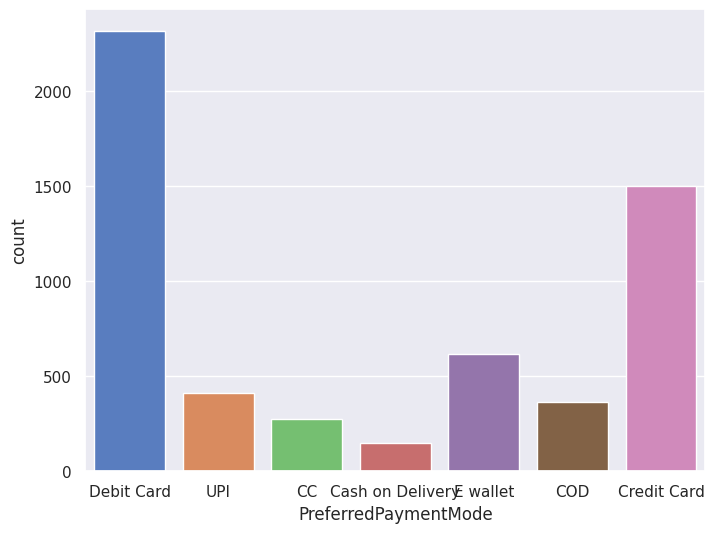

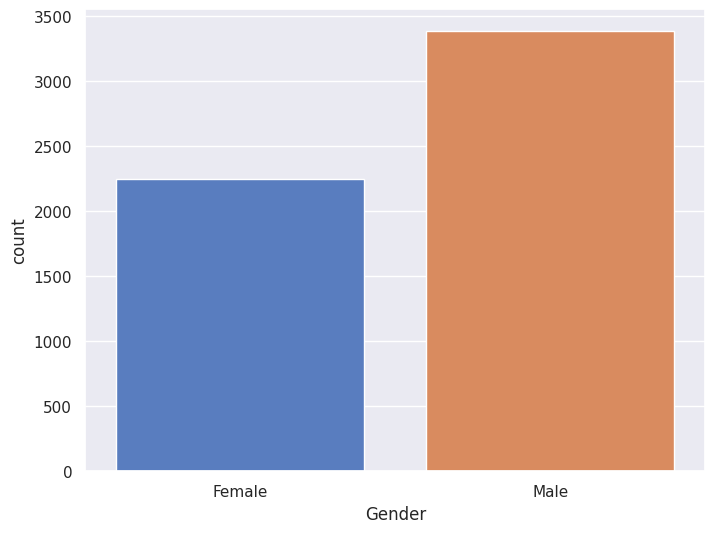

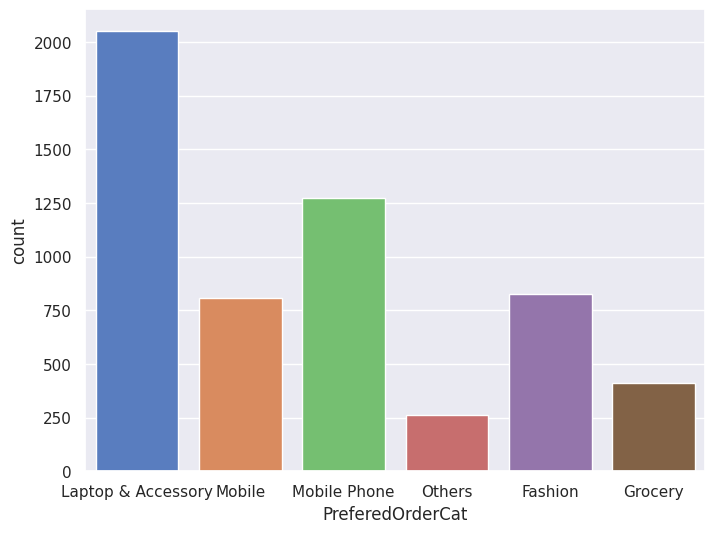

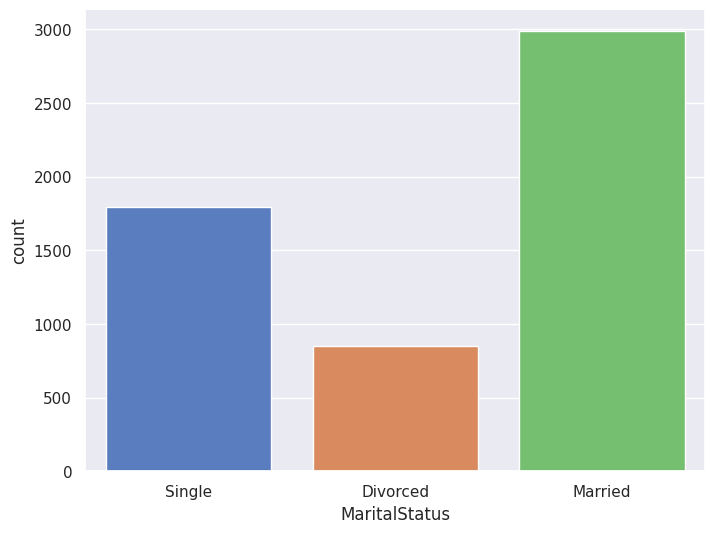

In [ ]:
# Count Plot for Categorical Columns: Visulaise The Distribution of Categorical Columns
for cols in categorical_cols:
  plt.figure(figsize = (8,6))
  sns.countplot(x=cols,data = df)
  plt.show()

### Bivariate Visualisation

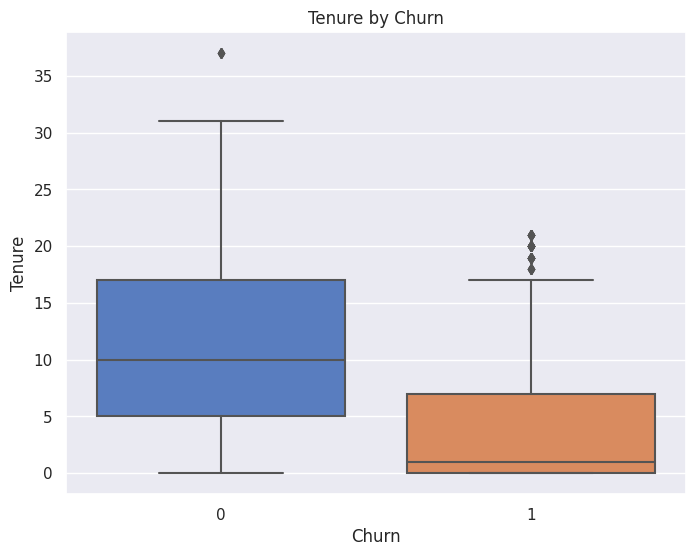

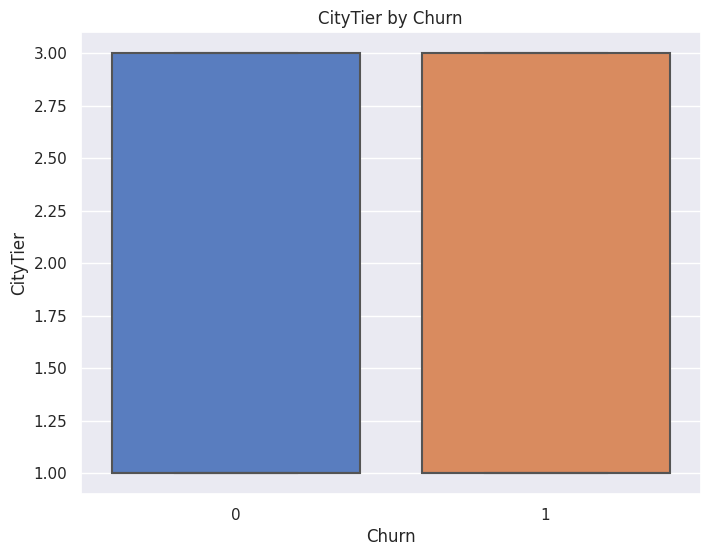

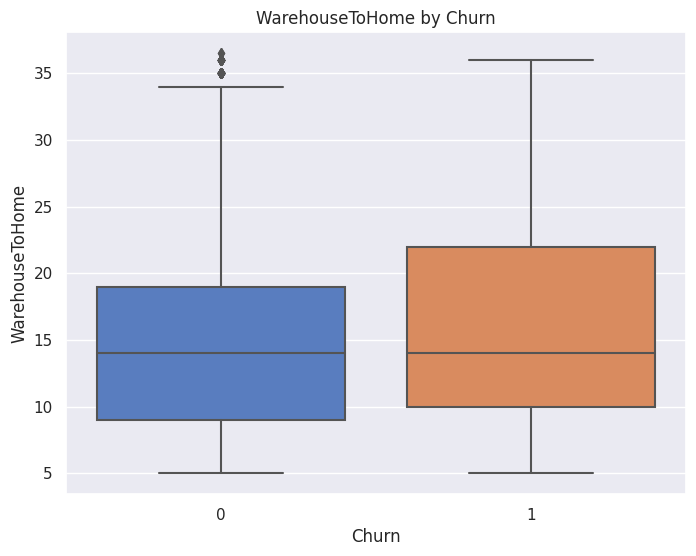

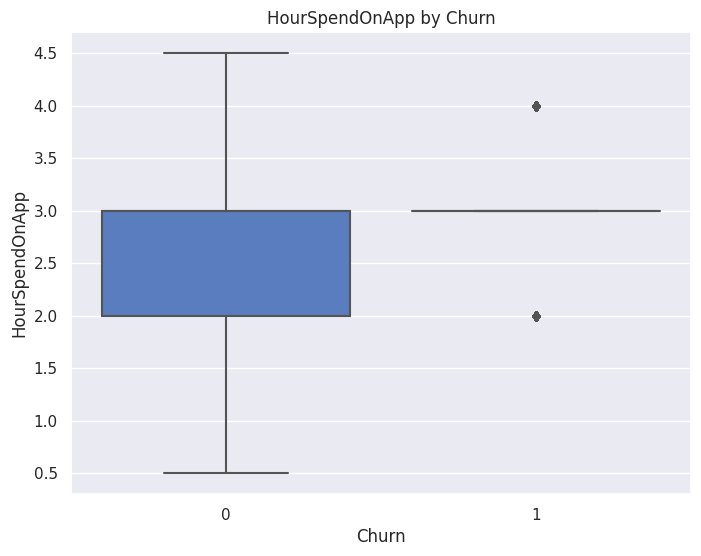

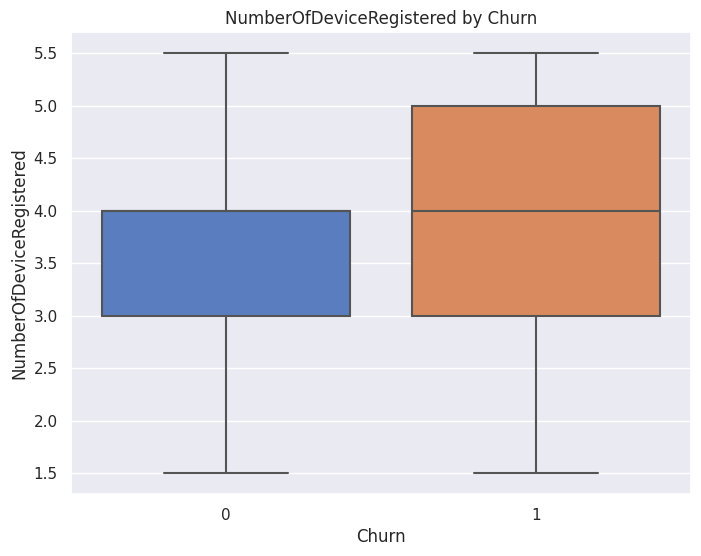

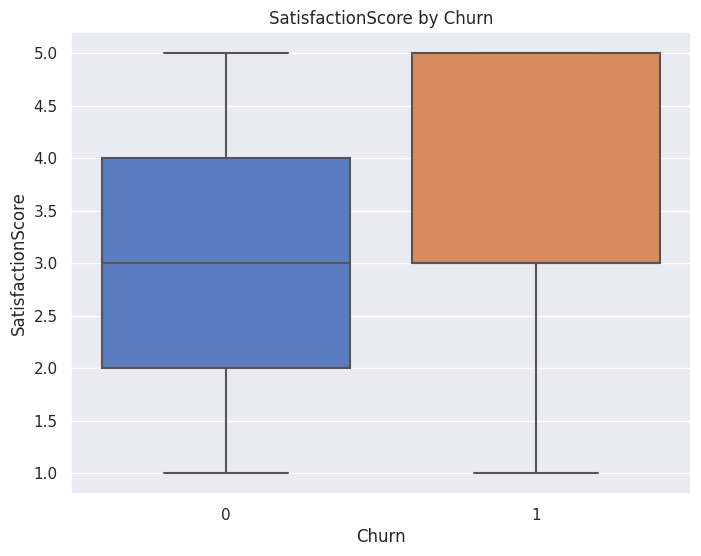

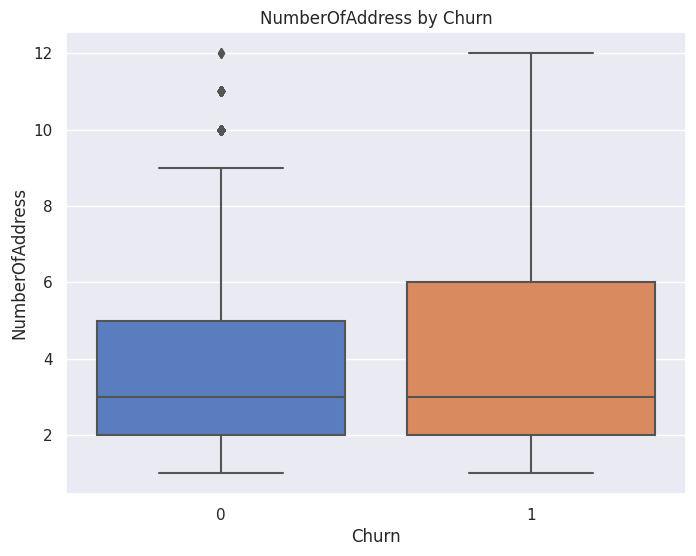

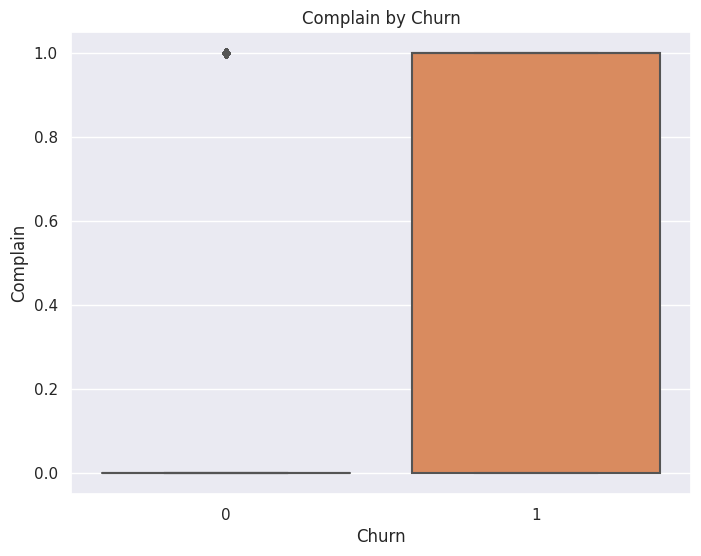

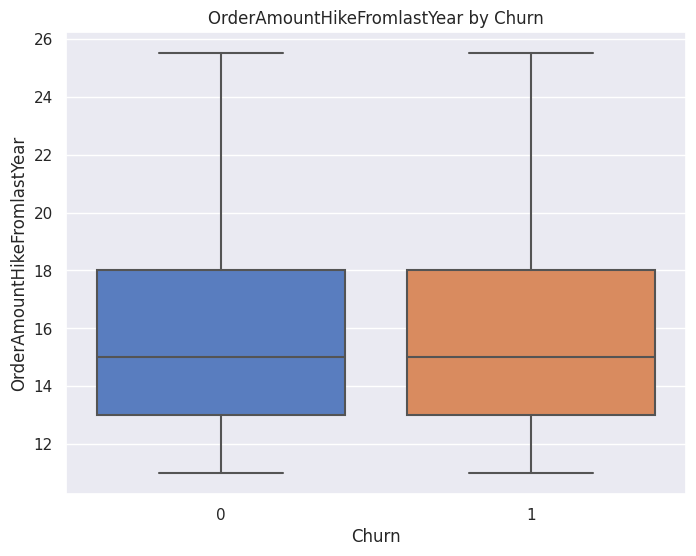

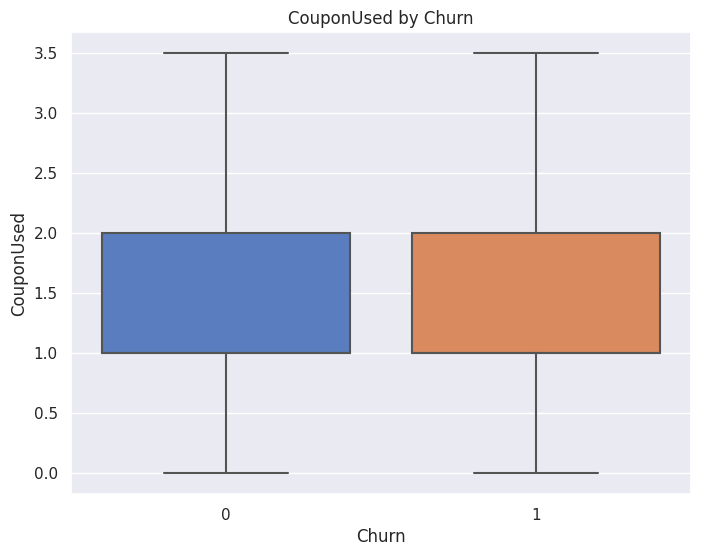

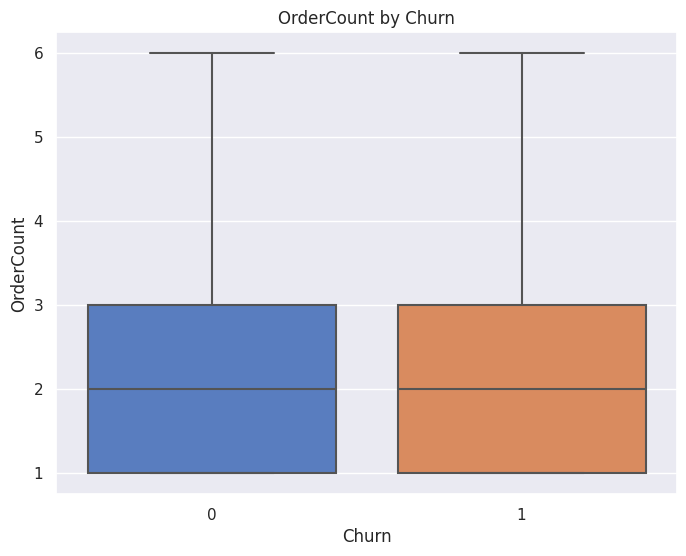

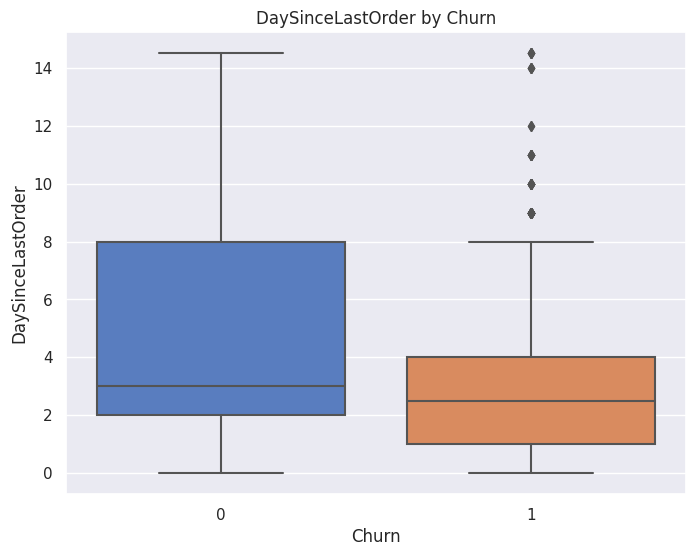

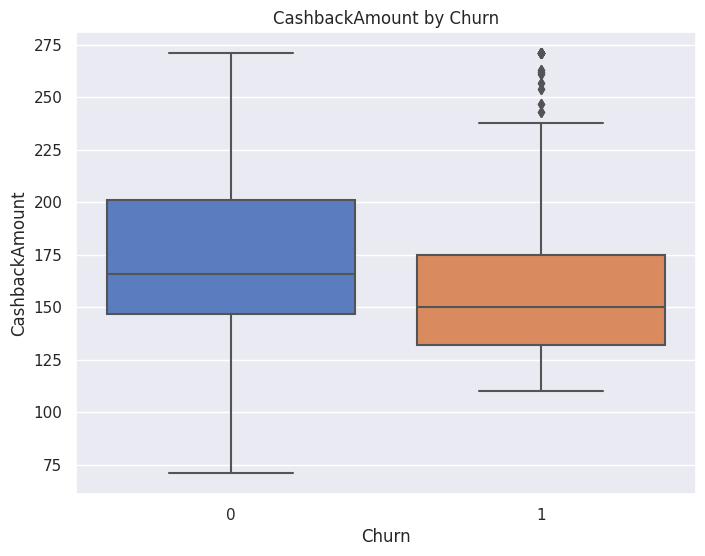

In [ ]:
# BoxPlot: Visualise the distribution of Numerical Columns by 'Churn'
for cols in numerical_cols:
  plt.figure(figsize = (8, 6))
  sns.boxplot(x='Churn', y=cols,  data = df)
  plt.title(f'{cols} by Churn')
  plt.show()

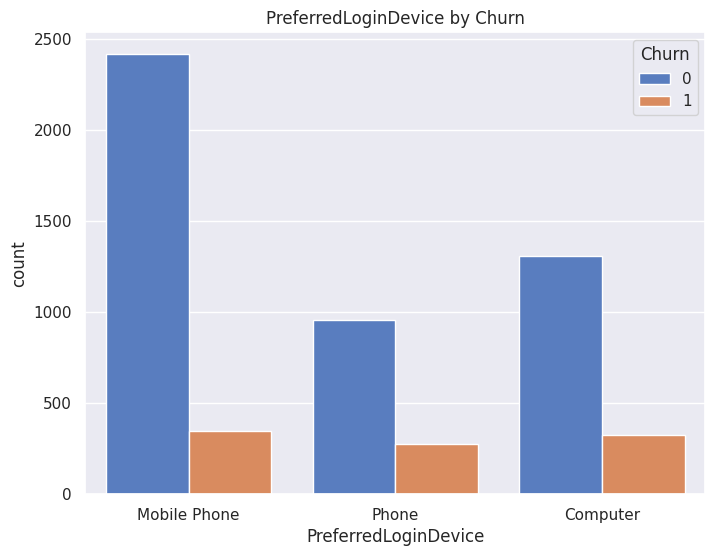

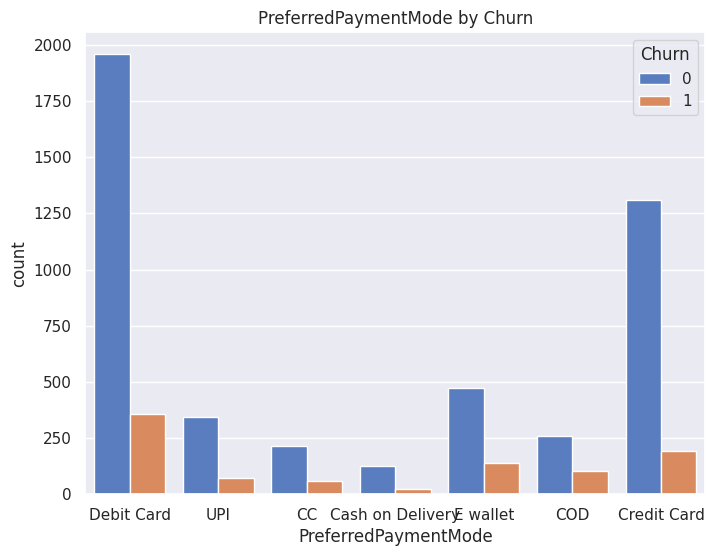

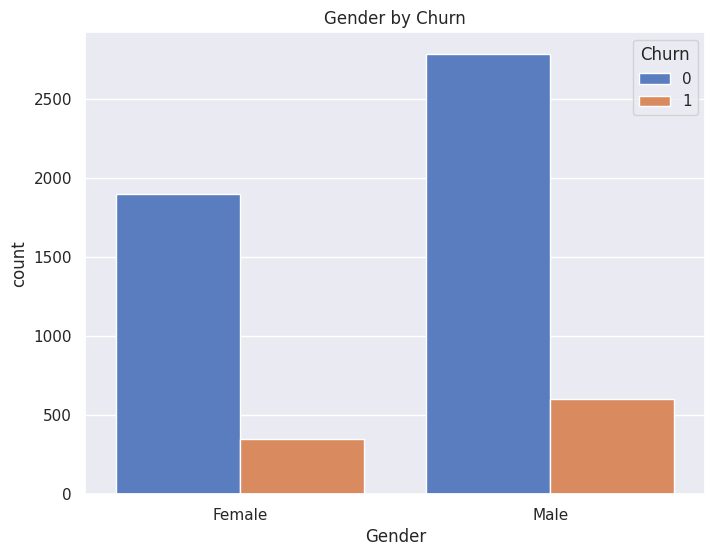

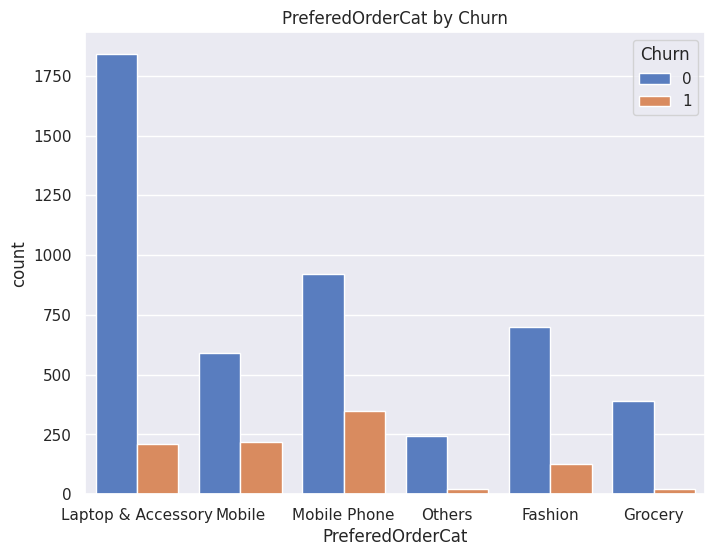

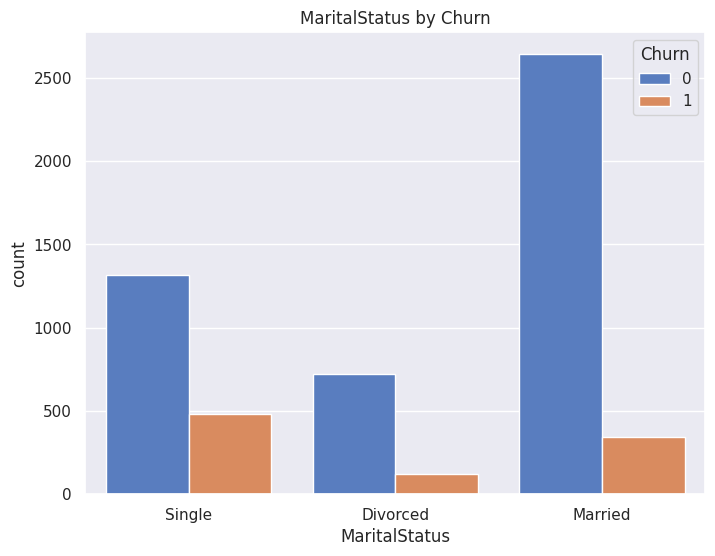

In [ ]:
# BarPlot: Visualise the distribution of categorical calumn by 'Churn'
for cols in categorical_cols:
  plt.figure(figsize = (8, 6))
  sns.countplot(x = cols, hue = 'Churn', data = df)
  plt.title(f'{cols} by Churn')
  plt.show()

### Multivatiate Visualisation

<ipython-input-22-8f7088fe8bdf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.zeros_like(df.corr())
<ipython-input-22-8f7088fe8bdf>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')


<Axes: >

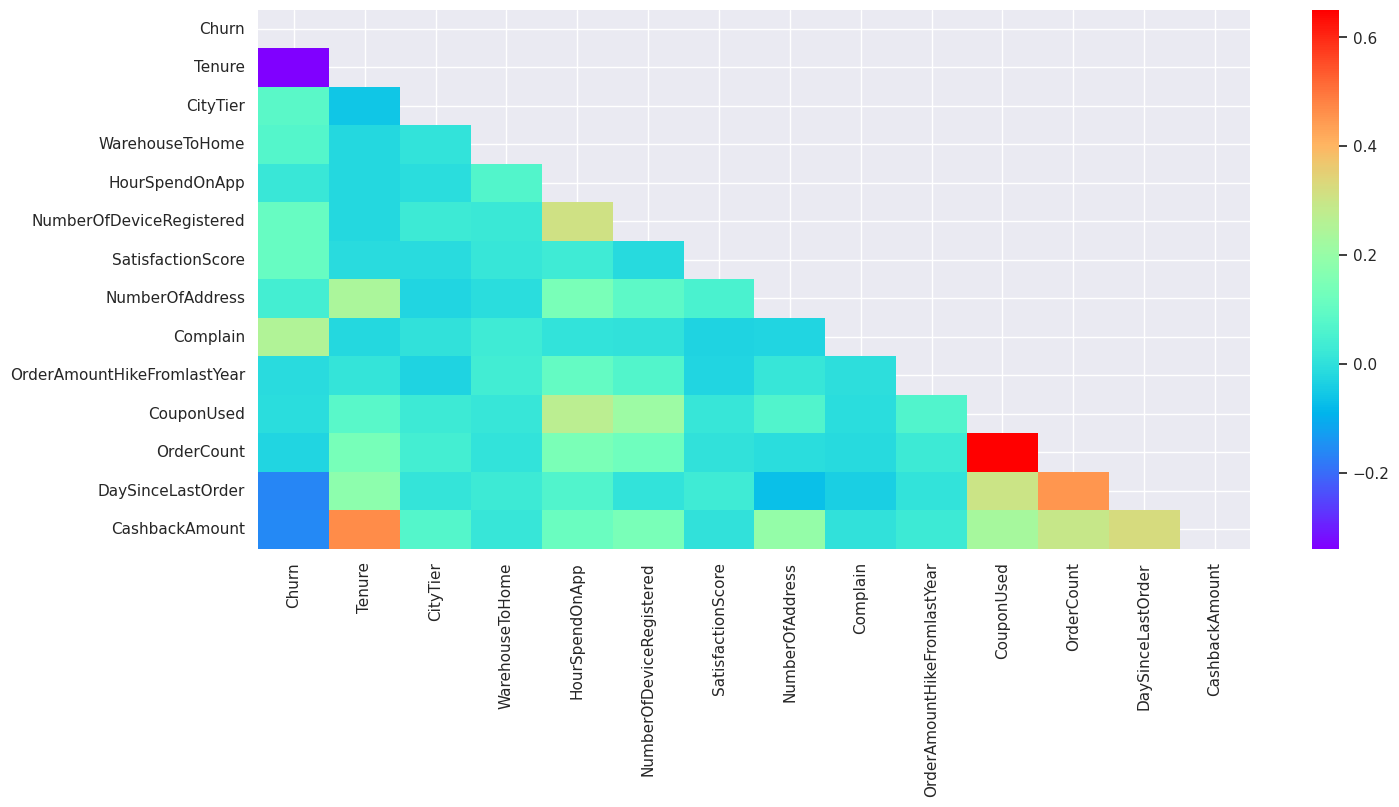

In [ ]:
# HeatMap
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap='rainbow')

**bold text**## Pre-Processing Of The Data For Model Building

In [ ]:
# Data Preparation
# OneHotEncoding of the categorical variable
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
ohe = OneHotEncoder()
ohe_cat = ohe.fit_transform(df[categorical_cols]).toarray()
ohe_df = pd.DataFrame(ohe_cat, columns=ohe.get_feature_names_out(input_features=categorical_cols))
df_encoded = pd.concat([df.drop(columns=categorical_cols), ohe_df], axis=1)
print(df_encoded.shape, df.shape)

(5630, 35) (5630, 19)


In [ ]:
# MinMaxScalling
mms = MinMaxScaler(feature_range = (0,1))
scaler_num = mms.fit_transform(df[numerical_cols])
scaler_df = pd.DataFrame(scaler_num, columns = mms.get_feature_names_out(input_features = numerical_cols))
df_scaled = pd.concat([df_encoded.drop(columns=numerical_cols), scaler_df], axis = 1)
df_scaled

,Churn,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,...,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.625,0.375,0.25,0.727273,1.0,0.000000,0.285714,0.0,0.344828,0.445
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.625,0.625,0.50,0.545455,1.0,0.275862,0.000000,0.0,0.000000,0.250
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.375,0.625,0.50,0.454545,1.0,0.206897,0.000000,0.0,0.206897,0.245
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.375,0.625,1.00,0.636364,0.0,0.827586,0.000000,0.0,0.206897,0.315
4,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.625,0.375,1.00,0.181818,0.0,0.000000,0.285714,0.0,0.206897,0.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.625,0.125,0.00,0.454545,0.0,0.482759,0.285714,0.2,0.275862,0.400
5626,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.625,0.875,1.00,0.454545,0.0,0.344828,0.285714,0.2,0.206897,0.770
5627,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.625,0.125,0.75,0.181818,1.0,0.689655,0.285714,0.2,0.275862,0.575
5628,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.875,0.875,0.75,0.272727,0.0,0.275862,0.571429,0.2,0.620690,0.540


## Model Building

In [ ]:
# Splitting the data into features and labels
# Features
X = df_scaled.drop('Churn', axis = 1)
# Labels
Y = df_scaled['Churn']

In [ ]:
# Splitting the dataset in Training Set And Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4504, 34), (4504,), (1126, 34), (1126,))

In [ ]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score
def print_evaluation_metrics(X_test, y_test, model_name):
  y_pred = model_name.predict(X_test)
  print("Accuracy Score Percentage: ", round(accuracy_score(y_test, y_pred)*100),'%')
  print("Precision Score: ", round(precision_score(y_test, y_pred)*100), '%')
  print("Recall Score: ", round(recall_score(y_test, y_pred)*100), '%')
  print("F1 Score: ", round(f1_score(y_test, y_pred)*100), '%')
  print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

### 1. Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
print_evaluation_metrics(X_test, y_test, lg)

Accuracy Score Percentage:  91 %
Precision Score:  89 %
Recall Score:  55 %
F1 Score:  68 %
Mean Absolute Error:  0.08614564831261101
Mean Squared Error:  0.08614564831261101


### 2. RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print_evaluation_metrics(X_test, y_test, rfc)

Accuracy Score Percentage:  97 %
Precision Score:  99 %
Recall Score:  81 %
F1 Score:  89 %
Mean Absolute Error:  0.03197158081705151
Mean Squared Error:  0.03197158081705151


### 3. XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print(print_evaluation_metrics(X_test, y_test, xgb))

Accuracy Score Percentage:  98 %
Precision Score:  99 %
Recall Score:  90 %
F1 Score:  94 %
Mean Absolute Error:  0.017761989342806393
Mean Squared Error:  0.017761989342806393
None


### 4. Artificial Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

# Fit the model
history = model.fit(X_train, y_train, epochs=70)

Epoch 1/70
141/141 [==============================] - 2s 3ms/step - loss: 0.3394 - accuracy: 0.8595
Epoch 2/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8870
Epoch 3/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2653 - accuracy: 0.8905
Epoch 4/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2522 - accuracy: 0.8917
Epoch 5/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9025
Epoch 6/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.9125
Epoch 7/70
141/141 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9174
Epoch 8/70
141/141 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9216
Epoch 9/70
141/141 [==============================] - 0s 3ms/step - loss: 0.1652 - accuracy: 0.9285
Epoch 10/70
141/141 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.9352

In [ ]:
model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9813


[0.21777351200580597, 0.9813498854637146]

In [ ]:
y_pred_model= model.predict(X_test)

36/36 [==============================] - 0s 2ms/step


Text(0.5, 0, 'epochs')

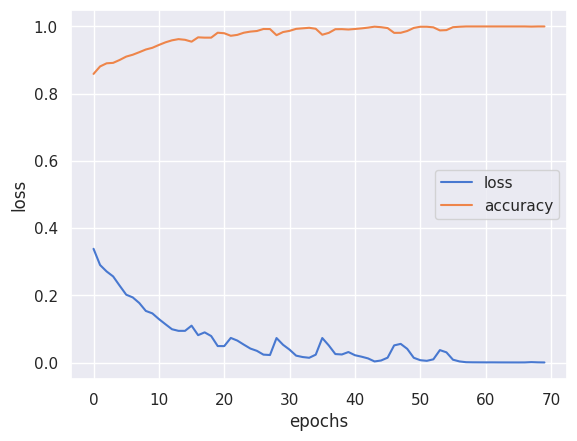

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2240      
                                                                 
 dense_1 (Dense)             (None, 100)               6500      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 8,841
Trainable params: 8,841
Non-trainable params: 0
_________________________________________________________________


<Axes: >

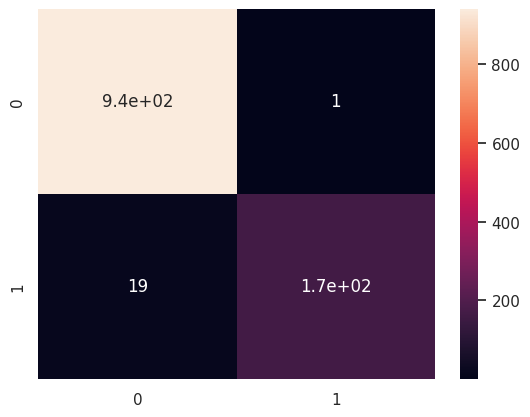

In [ ]:
y_pred = xgb.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)